# Simple Linear Discriminant Analysis Example

A simple example of how to perform a two variable linear discriminant analysis using pandas and numpy

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis

In [2]:
plt.rcParams['figure.figsize'] = [10, 5]

In [3]:
gen_sigma_s = [0.5, 0.3]
gen_sigma_b = [0.3, 0.6]
gen_mu_s = [1.0,0.7]
gen_mu_b = [0.1,-0.2]

In [4]:
df_sig = pd.DataFrame(np.random.normal(gen_mu_s,gen_sigma_s,(10000,2)), columns=list('xy'))
df_bkg = pd.DataFrame(np.random.normal(gen_mu_b,gen_sigma_b,(10000,2)), columns=list('xy'))

In [5]:
def plot_var(sig,bkg):
    vals = [sig.values,bkg.values]
    var_min = min( sig.mean()-5*sig.std(), bkg.mean()-5*bkg.std())
    var_max = max( sig.mean()+5*sig.std(), bkg.mean()+5*bkg.std())
    step = (var_max-var_min)/30
    bins = [ x*step + var_min for x in range(31) ]
    plt.hist(vals,bins=bins,stacked=False,label=['sig','bkg'])
    plt.legend()
    plt.show()
    return

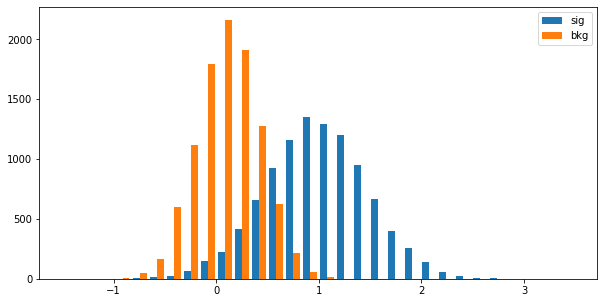

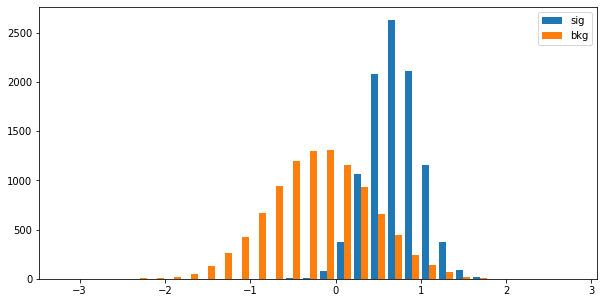

In [6]:
plot_var(df_sig.x,df_bkg.x)
plot_var(df_sig.y,df_bkg.y)

In [7]:
mu_s = np.array([df_sig.x.mean(),df_sig.y.mean()])
mu_b = np.array([df_bkg.x.mean(),df_bkg.y.mean()])

In [8]:
sigma_s = df_sig[ ['x','y'] ].cov().values
sigma_b = df_bkg[ ['x','y'] ].cov().values

In [9]:
mu_sub = mu_s - mu_b
cov_add = np.square(sigma_s) + np.square(sigma_b)

inv_cov = np.linalg.inv(cov_add)
alpha = inv_cov.dot(mu_sub)

In [10]:
# Define funtion to calculate linear discriminant for one row
def lin_comb(alpha,var1,var2):
    return var1*alpha[0] + var2*alpha[1]

# Now vectorize this function so it can be used for all rows
vlin_comb = np.vectorize(lin_comb, excluded=['alpha'])

In [11]:
df_sig['ld'] = vlin_comb( alpha=alpha, var1=df_sig.x, var2=df_sig.y)
df_bkg['ld'] = vlin_comb( alpha=alpha, var1=df_bkg.x, var2=df_bkg.y)

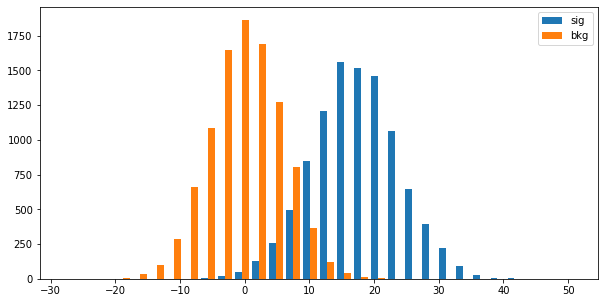

In [12]:
plot_var(df_sig.ld,df_bkg.ld)

In [13]:
def calc_sep(sig,bkg):
    return ((sig.mean()-bkg.mean())**2)/(sig.std()**2 + bkg.std()**2)

In [14]:
sep_x = calc_sep(df_sig.x,df_bkg.x)
sep_y = calc_sep(df_sig.y,df_bkg.y)
sep_ld = calc_sep(df_sig.ld,df_bkg.ld)
print('x sep. : ',sep_x)
print('y sep. : ',sep_y)
print('ld sep. : ',sep_ld)

x sep. :  2.3748504048563523
y sep. :  1.8222042621339747
ld sep. :  4.039788858534761


In [15]:
clf = LinearDiscriminantAnalysis()

In [16]:
X = np.concatenate( [df_sig.values,df_bkg.values] )
y = np.concatenate( [np.ones(len(df_sig.index)),np.zeros(len(df_bkg.index))] )

In [17]:
clf.fit(X,y)

/Library/Frameworks/Python.framework/Versions/3.6/lib/python3.6/site-packages/sklearn/discriminant_analysis.py:388: UserWarning: Variables are collinear.
  warnings.warn("Variables are collinear.")


LinearDiscriminantAnalysis(n_components=None, priors=None, shrinkage=None,
                           solver='svd', store_covariance=False, tol=0.0001)

In [18]:
df_sig['sk_ld'] = clf.decision_function(df_sig.values)
df_bkg['sk_ld'] = clf.decision_function(df_bkg.values)
print(df_sig.sk_ld.values)

[-1.70452578 -0.94769635  5.37786497 ...  4.79374354  5.66242789
  0.86078937]


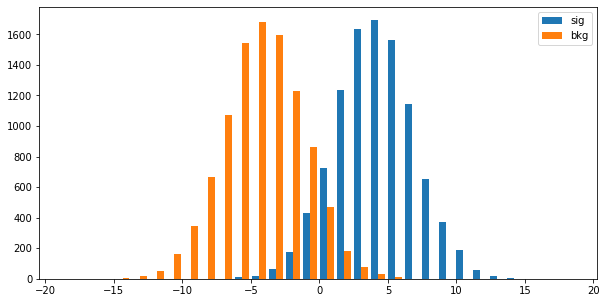

sk_ld sep. :  4.18014677767812


In [19]:
plot_var(df_sig.sk_ld,df_bkg.sk_ld)
print('sk_ld sep. : ',calc_sep(df_sig.sk_ld,df_bkg.sk_ld))